In [3]:
# this notebook is for Week2-Assignment-6)
# author: Rui Zeng, N15471955, rz2522@nyu.edu
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [27]:
# load the trajectory
import os
# change the directory to the data folder
os.chdir('../Data')
# top file is '1hz3_T310.start.nowater.gro'
# trajectory file is '1hz3_T310.stepid25000000.every100ps.nowater.xtc'
# load the trajectory
traj = md.load('1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='1hz3_T310.start.nowater.gro')
# get the number of frames
n_frames = traj.n_frames
# print the number of frames
print('The number of frames is', n_frames)
# print the time of each frame in ns
print('The time of each frame is ', traj.time/1000, 'ns')


The number of frames is 17
The time of each frame is  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.] ns
The radius of gyration is [0.85057444 1.00091706 1.00509146 0.9700538  1.03096215 1.08965024
 1.06154491 1.01728751 1.0467843  1.25890696 1.03388204 1.18969875
 1.03686539 1.03002704 1.00622438 1.02566947 1.03948413] nm


In [28]:
# define the function to compute the distance and radius
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist
# compute the radius of gyration
def radius_of_gyration(traj):
    rg = md.compute_rg(traj)
    return rg

File saved


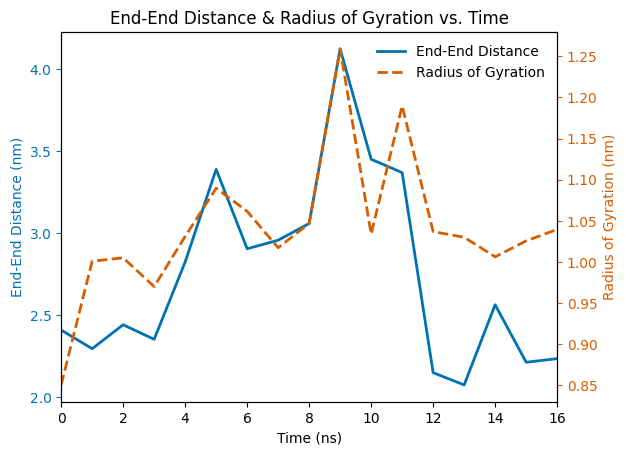

In [47]:
# figure 1
# plot end-end distance vs time and radius of gyration vs time
fig,ax1 = plt.subplots()
# title
plt.title('End-End Distance & Radius of Gyration vs. Time')
# plot, colorblinf friendly, linestype, linewidth
ax1.plot(traj.time/1000, dist, color='#0072B2', linestyle='solid', linewidth=2)
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('End-End Distance (nm)', color='#0072B2')
ax1.tick_params('y', colors='#0072B2')
# plot, colorblind friendly, linestype, linewidth
ax2 = ax1.twinx()
ax2.plot(traj.time/1000, rg, color='#D55E00', linestyle='dashed', linewidth=2)
ax2.set_ylabel('Radius of Gyration (nm)', color='#D55E00')
ax2.tick_params('y', colors='#D55E00')
# scale the x-axis
ax1.set_xlim(0, 16)
# legend
fig.legend(['End-End Distance', 'Radius of Gyration'], loc='upper right', bbox_to_anchor=(1,1),bbox_transform=ax1.transAxes,frameon=False)
# save figure， overwrite protection
fname = 'Part 6-Fig.1 End-End_Distance_&_Radius_of_Gyration_vs_Time.pdf'
if os.path.exists('../Homework/Plots/'+fname):
    print('File exists, overwrite?')
    print('1: yes, 0: no')
    overwrite = int(input())
    if overwrite == 1:
        plt.savefig('../Homework/Plots/'+fname)
        print('File saved')
        plt.show()                              
    else:
        print('File not saved')
else: 
    plt.savefig('../Homework/Plots/'+fname)
    print('File saved')
    plt.show()




File exists, overwrite?
1: yes, 0: no
File saved


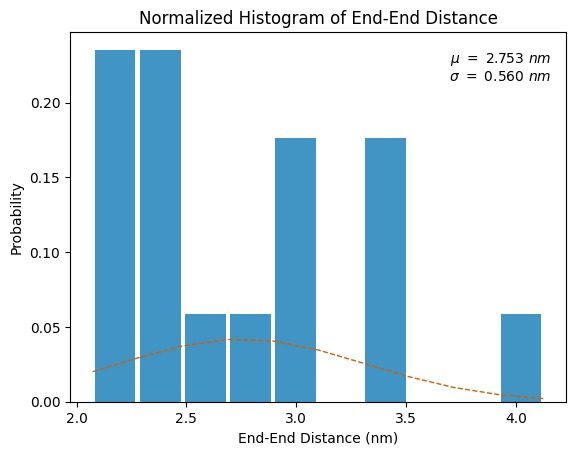

In [268]:
# figure 2
# plot normalized histogram of end-end distance
data = dist
# plot histogram, colorblinf friendly, bin number, density, alpha
n, bins, patches = plt.hist(data, density=False, weights=np.ones(len(data)) / len(data), alpha=0.75, color='#0072B2', rwidth=0.9)
plt.title('Normalized Histogram of End-End Distance')
plt.xlabel('End-End Distance (nm)')
plt.ylabel('Probability')
# plot curve, colorblind friendly, linewidth
sigma = np.std(data)
mu = np.mean(data)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y/len(data), linewidth=1, color='#D55E00', linestyle='dashed')
# add mean value to top right of histogram, unit: nm
plt.text(0.95, 0.95, r'$\mu\ =\ %.3f \ nm$' % mu, horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes)
# add standard deviation to top right of histogram, unit: nm
plt.text(0.95, 0.90, r'$\sigma\ =\ %.3f \ nm$' % sigma, horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes)
# save figure， overwrite protection
fname = 'Part 6-Fig.2 Normalized_Histogram_of_End-End_Distance.pdf'
if os.path.exists('../Homework/Plots/'+fname):
    print('File exists, overwrite?')
    print('1: yes, 0: no')
    overwrite = int(input())
    if overwrite == 1:
        plt.savefig('../Homework/Plots/'+fname)
        print('File saved')
        plt.show()                              
    else:
        print('File not saved')
else: 
    plt.savefig('../Homework/Plots/'+fname)
    print('File saved')
    plt.show()


File exists, overwrite?
1: yes, 0: no
File saved


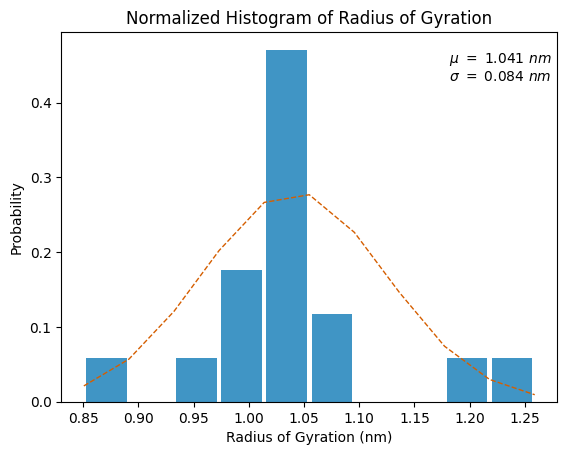

In [269]:
# figure 3
# plot normalized histogram of radius of gyration
data = rg
# plot histogram, colorblinf friendly, bin number, density, alpha
n, bins, patches = plt.hist(data, density=False, weights=np.ones(len(data)) / len(data), alpha=0.75, color='#0072B2',rwidth=0.9)
plt.title('Normalized Histogram of Radius of Gyration')
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Probability')
# plot curve, colorblind friendly，linewidth
sigma = np.std(data)
mu = np.mean(data)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
        np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y/len(data), linewidth=1, color='#D55E00', linestyle='dashed')
# add mean value to top right of histogram, unit: nm
plt.text(0.95, 0.95, r'$\mu\ =\ %.3f \ nm$' % mu, horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes)
# add standard deviation to top right of histogram, unit: nm
plt.text(0.95, 0.90, r'$\sigma\ =\ %.3f \ nm$' % sigma, horizontalalignment='right', verticalalignment='top', transform=ax1.transAxes)
# save figure， overwrite protection
fname = 'Part 6-Fig.3 Normalized_Histogram_of_Radius_of_Gyration.pdf'
if os.path.exists('../Homework/Plots/'+fname):
        print('File exists, overwrite?')
        print('1: yes, 0: no')
        overwrite = int(input())
        if overwrite == 1:
                plt.savefig('../Homework/Plots/'+fname)
                print('File saved')
                plt.show()                              
        else:
                print('File not saved')
else: 
        plt.savefig('../Homework/Plots/'+fname)
        print('File saved')
        plt.show()
        

